<a href="https://colab.research.google.com/github/Daniel-MDA/Scikit-Learning-Training/blob/main/Lab08_KNN_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab08_KNN_01

### Disciplina Inteligência Artificial

### Prof: José Humberto Cruvinel

### Nome dos alunos:

Daniel Moacir de Ávila - 321120078

Neste jupyter vamos criar um modelo KNN (K vizinhos mais próximos) para classificar espécies de flores Iris.

Dataset: https://archive.ics.uci.edu/ml/datasets/iris

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/) 

In [1]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline 

## Carregando o dataset

In [2]:
# Importando o dataset iris
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# Vendo o shape
print('Data:',iris.data.shape)
print('Target:',iris.target.shape)

Data: (150, 4)
Target: (150,)


Veja que são 150 exemplos, 4 variáveis preditoras e 1 variável Alvo (Target)

In [4]:
# Nome das colunas preditoras
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# classes alvo (TARGET)
iris.target_names.tolist()

['setosa', 'versicolor', 'virginica']

In [6]:
# Mostrando as primeiras 5 linhas do dataset
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
# Podemos também trabalhar com o Pandas
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Adicionando as colunas Target e Target_Name
df['Target'] = iris.target
df['Target_Name'] = df.apply(lambda row: iris.target_names[int(row.Target)], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target_Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
# Vamos verificar se existem valores nulos
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
Target_Name          0
dtype: int64

In [10]:
# Imprimindo o describe()
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Explorando o Dataset

In [11]:
# Distribuição do target
df['Target'].value_counts()

0    50
1    50
2    50
Name: Target, dtype: int64

Veja que temos exatamente 50 exemplos para cada espécie, indicando que as classes estão balanceadas

<AxesSubplot:>

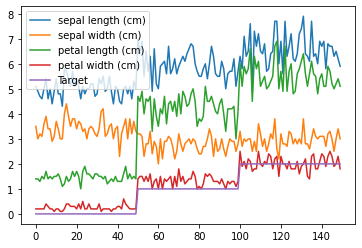

In [12]:
# Vamos plotar o DataFrame para ver se encontramos alguma correlação entre as variáveis que determinam o resultado
df.plot()

Não foi possível encontrar uma relação. Vamos tentar de outra forma

In [13]:
# Criando uma função para plotar a correlação entre as variáveis
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = False, top = False, left = False, right = False) 
    plt.colorbar()
    plt.show()

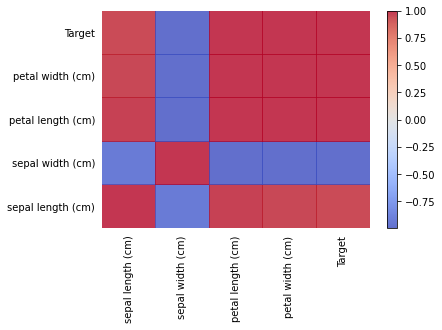

In [14]:
# Vamos gerar a matriz de correlação entre as variáveis e a variável alvo
matriz_corr = df.corr()
observations = len(matriz_corr)
variables = matriz_corr.columns
visualize_correlation_matrix(matriz_corr, hurdle = 0.5)

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target_Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


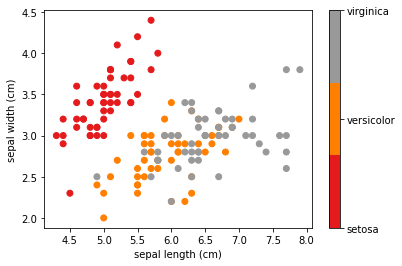

In [16]:
# Vamos imprimir a relação entre "sepal length" x "sepal width"
plt.scatter(iris.data[:, 0], iris.data[:, 1],
            c=iris.target, cmap=plt.cm.get_cmap('Set1', 3))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
color_bar_formating = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.colorbar(ticks = [0,1,2], format = color_bar_formating)

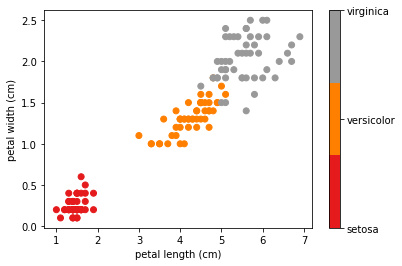

In [17]:
# Vamos imprimir a relação entre "petal length" x "petal width"
plt.scatter(iris.data[:, 2], iris.data[:, 3],
            c=iris.target, cmap=plt.cm.get_cmap('Set1', 3))
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
color_bar_formating = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.colorbar(ticks = [0,1,2], format = color_bar_formating)

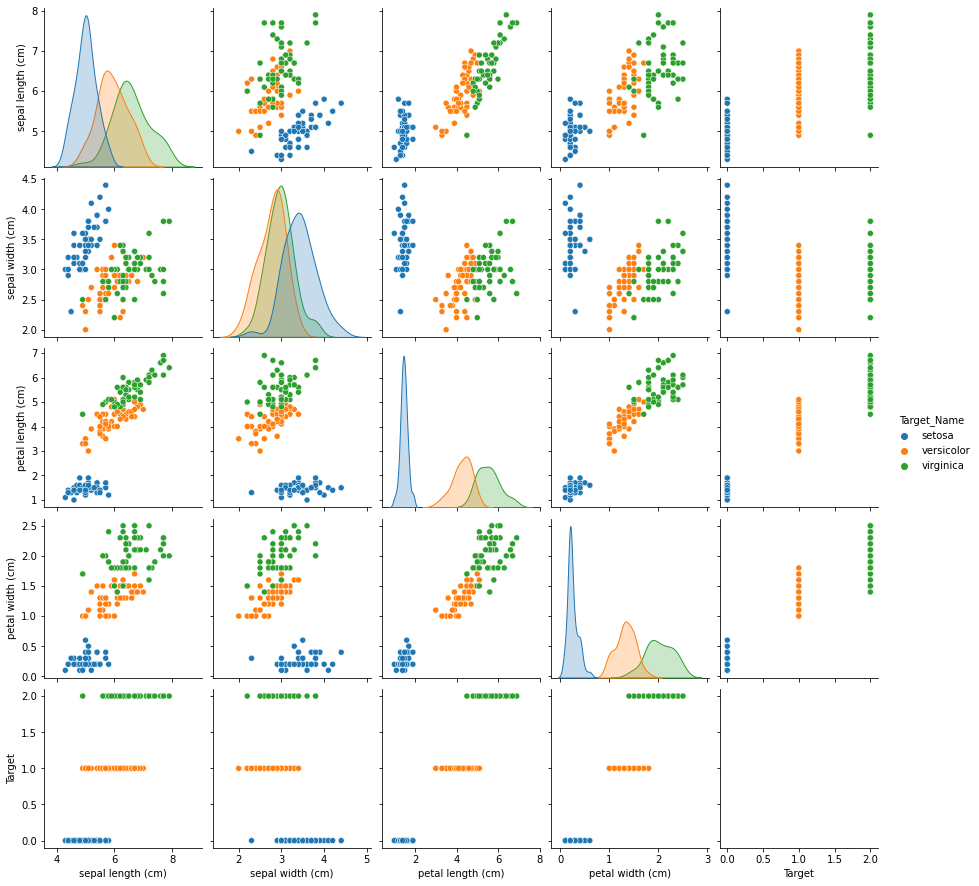

In [18]:
# Plotando os gráficos entre as variáveis
sns.pairplot(df, hue='Target_Name') 

Nos gráficos acima vemos a plotagem de todas as possíveis combinações entre as variáveis. 
Novamente podemos ver que os gráficos que possuem mais forte correlação são entre as variáveis  'petal_length' x 'petal_width'

In [19]:
# Vamos separar as variáveis (X) do resultado (y)
X = df.iloc[:,:-2]
y = df['Target'].values

In [20]:
# Imprimindo os primeiros valores de X
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
# Imprimindo os 10 primeiros valores de y
print(y[:10])

[0 0 0 0 0 0 0 0 0 0]


In [22]:
# Imprimindo o Shape de X e y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## KNN (K – Nearest Neighbours)

In [23]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (120, 4)
y_train: (120,)
X_test: (30, 4)
y_test: (30,)


In [24]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
# prevendo valores para X_test
y_pred = knn.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (30,)


In [26]:
# Imprimindo o Score para os dados de teste
from sklearn.metrics import accuracy_score
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K = 5")

Accuracy is  90.0 % for K = 5


In [29]:
# Medidas de desempenho
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Precision:",precision_score(y_pred,y_test,average='weighted'))
print("Recall:",recall_score(y_pred,y_test,average='weighted'))
print("F1 Score:",f1_score(y_pred,y_test,average='weighted'))

Accuracy: 0.9
Precision: 0.925
Recall: 0.9
F1 Score: 0.9


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


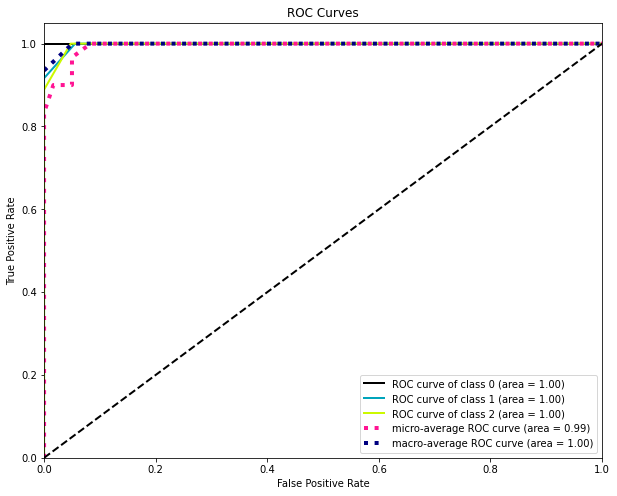

In [30]:
!pip install scikit-plot
# Plotando a curva ROC para os dados de teste
from scikitplot.metrics import plot_roc
y_probas = knn.predict_proba(X_test)
plot_roc(y_test, y_probas, figsize=(10, 8))   
plt.show()

In [31]:
# Fazendo uma previsão de valores fictícios (2cm x 2cm sepal - 4cm x 2cm petal)
ex1 = [2, 2, 4, 2]
output = knn.predict([ex1,]) 
print ('Espécie prevista:', iris.target_names[output][0])
print ('Probabilidades:') 
print ('  Espécies:', iris.target_names)
print ('  Probab. :', knn.predict_proba([ex1, ]))

Espécie prevista: versicolor
Probabilidades:
  Espécies: ['setosa' 'versicolor' 'virginica']
  Probab. : [[0.  0.8 0.2]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [32]:
# Finalmente, vamos executar o mesmo processo com vários valores de K para ver se conseguimos aumentar a precisão
results_x = []
results_y = []
for K in range(5):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    print ("Accuracy is ", accuracy,"% for K-Value:",K_value)
    results_x.append(K_value)
    results_y.append(accuracy)    

Accuracy is  96.66666666666667 % for K-Value: 1
Accuracy is  96.66666666666667 % for K-Value: 2
Accuracy is  96.66666666666667 % for K-Value: 3
Accuracy is  96.66666666666667 % for K-Value: 4
Accuracy is  90.0 % for K-Value: 5


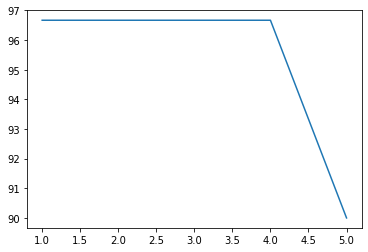

In [33]:
# Finalmente, vamos plotar o resultado da acurácia versos o valor de K
plt.plot(results_x,results_y)

# Exercício KNN 01 (Lab08_KNN_01)

Consulte a documentação do KNN em http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html e altere alguns hiper-parâmetros do modelo para ver se consegue aumentar o desempenho.

Salve os resultados (Acurácia apenas) em uma tabela, contendo os valores utilizados.

Execute novamente para mais valores de K e plote o resultado, adicionando no gráfico o título e legendas dos eixos.

Responda a pergunta: Qual a melhor acurácia foi possível obter? Qual o valor de K foi utilizado? 



Conforme o Modelo abaixo a melhor acurácia obtida foi de 97,7...% utilizando k=4, test_size=0.3, weights='distance', algorithm='auto'.

In [34]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.3, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (105, 4)
y_train: (105,)
X_test: (45, 4)
y_test: (45,)


In [35]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, weights='distance', algorithm='auto')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [36]:
# prevendo valores para X_test
y_pred = knn.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (45,)


In [37]:
# Imprimindo o Score para os dados de teste
from sklearn.metrics import accuracy_score
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K = 4")

Accuracy is  97.77777777777777 % for K = 4


In [39]:
# Medidas de desempenho
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Precision:",precision_score(y_pred,y_test,average='weighted'))
print("Recall:",recall_score(y_pred,y_test,average='weighted'))
print("F1 Score:",f1_score(y_pred,y_test,average='weighted'))

Accuracy: 0.9777777777777777
Precision: 0.9790849673202615
Recall: 0.9777777777777777
F1 Score: 0.9777313363520261


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


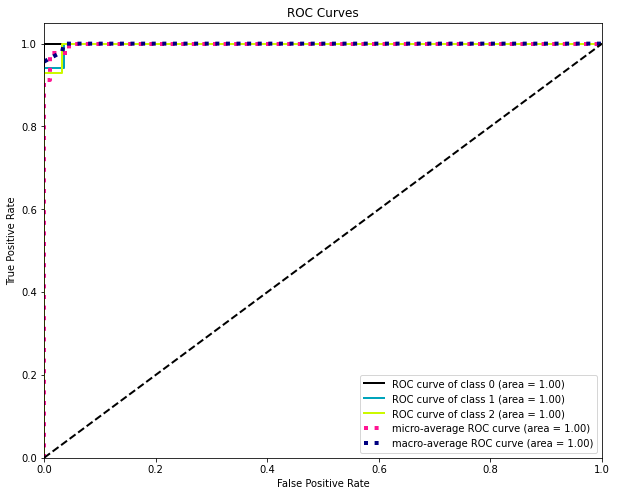

In [40]:
!pip install scikit-plot
# Plotando a curva ROC para os dados de teste
from scikitplot.metrics import plot_roc
y_probas = knn.predict_proba(X_test)
plot_roc(y_test, y_probas, figsize=(10, 8))   
plt.show()

In [42]:
# Finalmente, vamos executar o mesmo processo com vários valores de K para ver se conseguimos aumentar a precisão
results_x = []
results_y = []
for K in range(5):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    print ("Accuracy is ", accuracy,"% for K-Value:",K_value)
    results_x.append(K_value)
    results_y.append(accuracy)    

Accuracy is  95.55555555555556 % for K-Value: 1
Accuracy is  95.55555555555556 % for K-Value: 2
Accuracy is  95.55555555555556 % for K-Value: 3
Accuracy is  97.77777777777777 % for K-Value: 4
Accuracy is  93.33333333333333 % for K-Value: 5


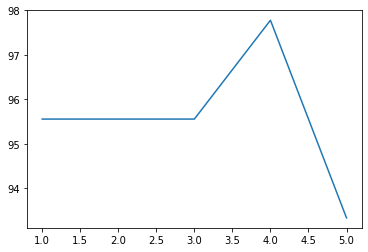

In [43]:
# Finalmente, vamos plotar o resultado da acurácia versos o valor de K
plt.plot(results_x,results_y)

FIM